In [1]:
# -*- coding: utf-8 -*-
# -*- author : Lokman Mheni - Fabio Palmisano -*-
# -*- date : 2024-04-20 -*-
# -*- Last revision: 2024-05-14 *-
# -*- python version : 3.11.9 -*-
# -*- Description: Notebook containing the project of NML 2024-*-

# <center> EE - 452: Network Machine Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Bookreads recommenders </center>
---

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

#!pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
from tqdm import tqdm

ratings = pd.read_csv( 'data/ratings.csv' )
tr = pd.read_csv( 'data/to_read.csv' )
b = pd.read_csv( 'data/books.csv' )

t = pd.read_csv( 'data/tags.csv' )
bt = pd.read_csv( 'data/book_tags.csv')

# Data Preprocessing

In [3]:
# Ratings data
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


<Axes: >

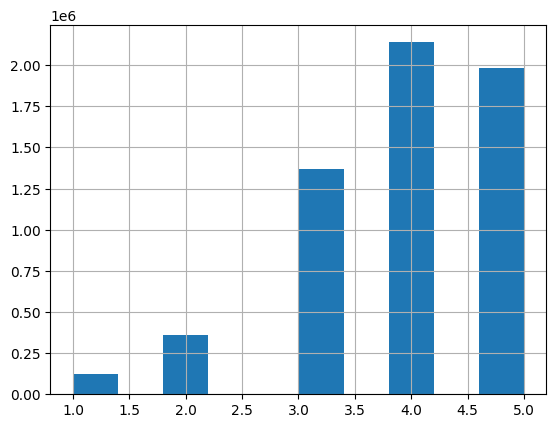

In [4]:
ratings['rating'].hist()

In [5]:
len(ratings)

5976479

In [6]:
# Pint the top 10 books of ratings
ratings['book_id'].value_counts().head(10)


book_id
1     22806
2     21850
4     19088
3     16931
5     16604
17    16549
20    15953
18    15855
23    15657
7     15558
Name: count, dtype: int64

In [7]:
#Print the top 10 user_id with more ratings 
ratings['user_id'].value_counts()

user_id
12874    200
30944    200
52036    199
12381    199
28158    199
        ... 
32128     21
40753     21
51725     21
43675     20
34590     19
Name: count, Length: 53424, dtype: int64

In [8]:
# take last 10 elements of ratings['user_id'].value_counts().head(10)
ratings['user_id'].value_counts().tail(10)


user_id
32960    22
22020    22
25258    22
42736    22
43672    22
32128    21
40753    21
51725    21
43675    20
34590    19
Name: count, dtype: int64

In [9]:
# Create an empty graph
#G = nx.Graph()

# Iterate over the 'tr' DataFrame and add edges between users who added the same book to 'to read'
#for _, row in tqdm(tr.iterrows(), total=len(tr)):
#    book_id = row['book_id']
#    user_id = row['user_id']
    
    # Get all users who added the same book to 'to read'
#    same_book_users = tr[tr['book_id'] == book_id]['user_id'].tolist()
    
    # Add edges between the current user and all other users who added the same book
#    for other_user in same_book_users:
#        if user_id != other_user:
#            G.add_edge(user_id, other_user)

# Plot the graph
#nx.draw(G, with_labels=True)

# Graph Creation

##  User to User graph

In [10]:
# Quickest 
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

# Sample because it's taking too long

r = ratings.sample(frac=0.1)
# Create a dictionary where the keys are book_ids and the values are sets of user_ids
book_users = defaultdict(set)

# Populate the dictionary
for _, row in tqdm(r.iterrows(), total=r.shape[0]):
    book_users[row['book_id']].add(row['user_id'])

# Create an empty graph
graph = nx.Graph()

# Iterate over each book
for book_id, users in tqdm(book_users.items(), total=len(book_users)):
    # Generate all pairs of users for this book
    user_pairs = combinations(users, 2)
    
    # Add edges between all pairs of users
    for user_pair in user_pairs:
        graph.add_edge(*user_pair)

# Print the number of nodes and edges in the graph
print(len(graph.nodes()))
print(len(graph.edges()))

100%|██████████| 9998/9998 [03:12<00:00, 51.88it/s]  


53395
92808399


In [11]:
graph.nodes()

NodeView((8211, 14357, 32796, 14368, 32806, 30761, 10283, 43053, 36909, 34862, 34873, 20541, 20545, 2125, 47183, 12369, 10333, 22624, 43106, 14435, 26726, 47229, 36991, 14468, 12421, 8326, 2186, 32909, 45200, 20624, 16542, 8350, 8371, 43199, 30914, 35012, 39113, 30932, 45276, 39136, 20711, 28904, 51431, 22764, 4338, 30973, 20739, 30989, 33040, 12561, 26900, 20761, 8484, 14631, 18732, 47404, 39215, 47408, 26942, 10562, 10565, 37189, 41285, 18766, 39249, 39250, 45405, 29024, 41313, 8548, 8563, 43382, 12668, 8575, 10624, 20869, 35207, 43404, 20880, 27032, 29080, 22943, 16808, 33192, 16812, 20912, 33202, 47554, 25037, 4562, 31188, 29141, 37334, 47572, 49632, 45540, 10729, 51697, 2551, 18935, 20991, 25101, 43534, 47633, 6681, 29209, 12840, 21040, 16949, 14909, 51773, 33345, 41542, 2634, 23119, 19024, 4689, 45652, 29278, 8804, 33385, 2667, 39532, 10863, 19057, 27253, 31349, 12924, 23169, 41603, 8843, 6797, 6801, 49813, 33445, 19112, 17067, 2733, 12976, 17074, 23227, 10943, 35524, 37579, 4168

In [12]:
ratings.query('user_id == 12874')

,user_id,book_id,rating
786481,12874,306,4
786482,12874,118,4
786483,12874,43,4
786484,12874,943,3
786485,12874,1186,4
...,...,...,...
786728,12874,846,4
786730,12874,4974,4
786731,12874,4244,3
786733,12874,189,4


Mean degree for the first 10 nodes: 9.0
Mean degree for the first 20 nodes: 19.0
Mean degree for the first 30 nodes: 29.0


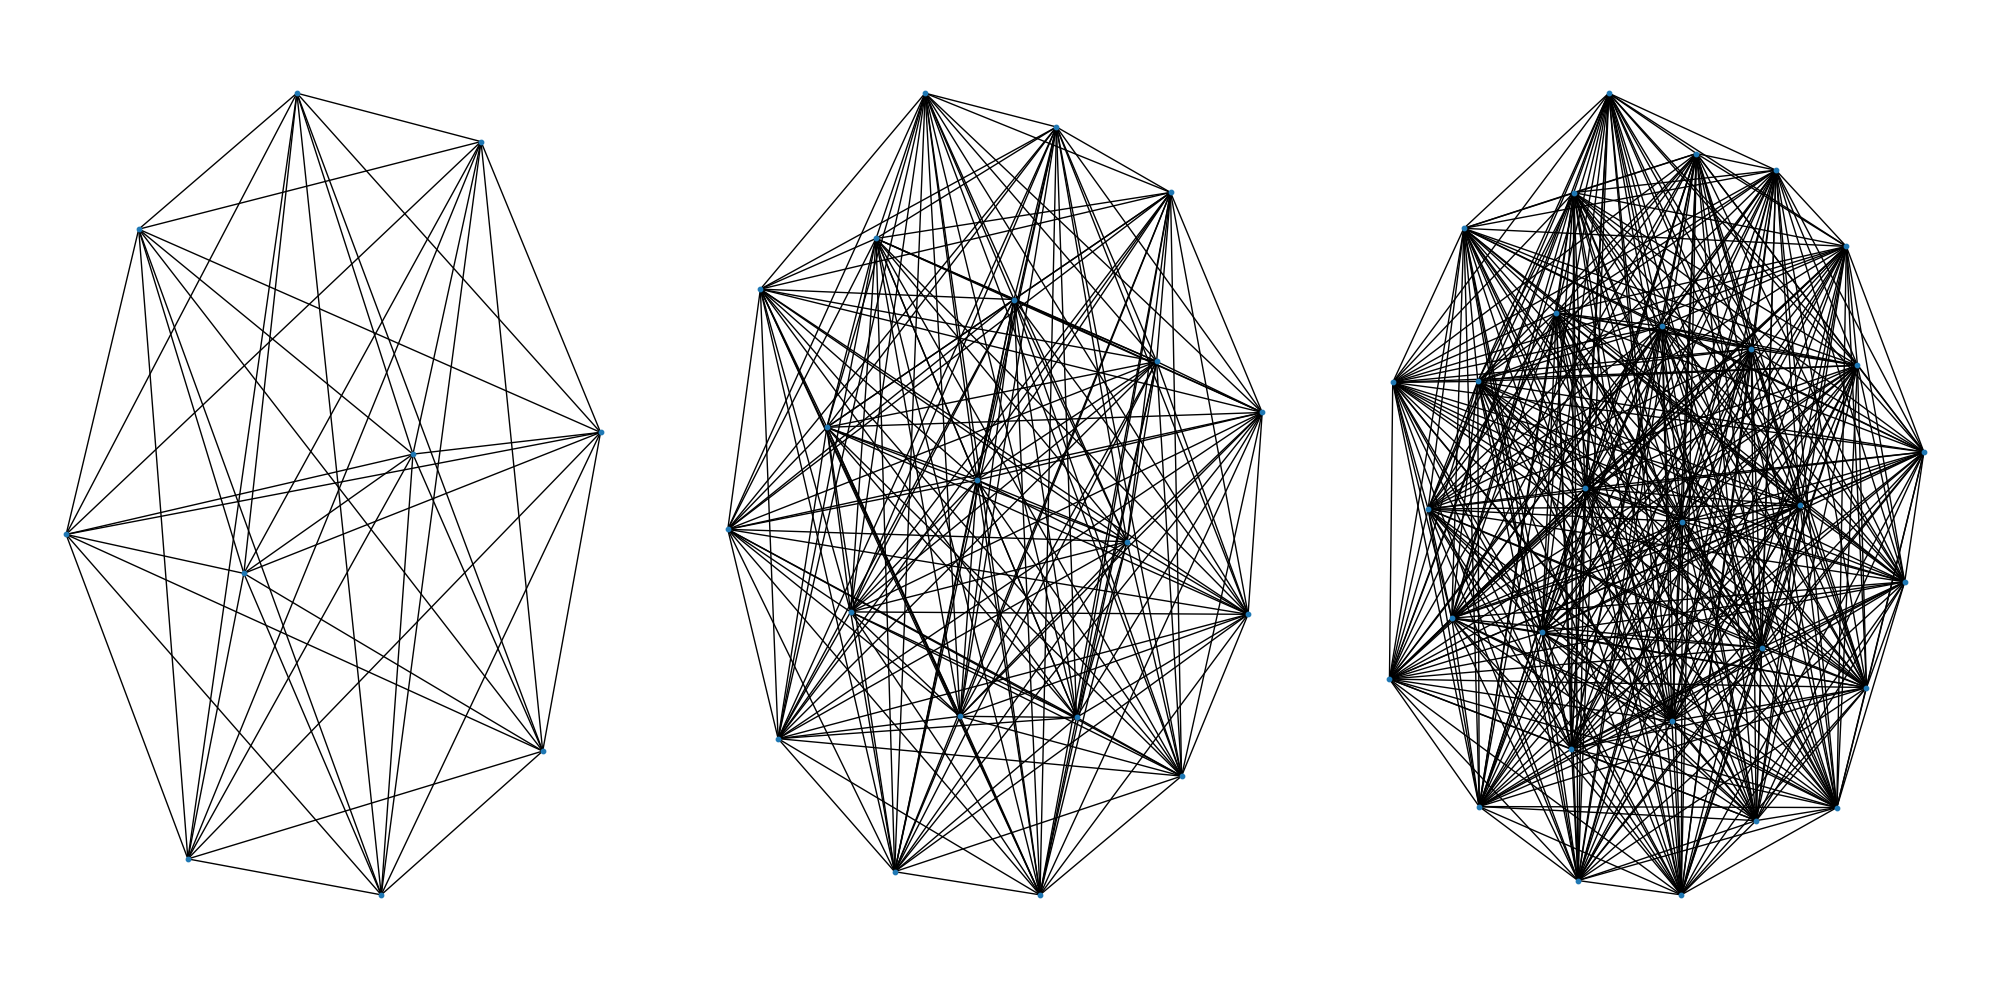

In [13]:
import matplotlib.pyplot as plt

# Set up the figure and the grid of subplots
plt.figure(figsize=(20, 10))


sampled_nodes = list(graph.nodes())[:10]

# Iterate over the first 9 subplots
for i in range(3):
    # Get the first 10 * (i + 1) nodes
    sampled_nodes = list(graph.nodes())[:10 * (i + 1)]
    
    # Create a subgraph with the sampled nodes
    sampled_graph = graph.subgraph(sampled_nodes)

    degree = dict(sampled_graph.degree())
    mean_degree = np.mean(list(degree.values()))
    print(f"Mean degree for the first {len(sampled_nodes)} nodes: {mean_degree}")
    
    # Draw the subgraph and print the mean degree of the nodes present in this sampled graph

    
    plt.subplot(1, 3, i + 1)
    

    nx.draw(sampled_graph, with_labels=False, node_size=10)

plt.tight_layout()
plt.show()


Mean degree for the first 10 nodes: 0.6
Mean degree for the first 10 nodes: 0.0
Mean degree for the first 10 nodes: 0.0


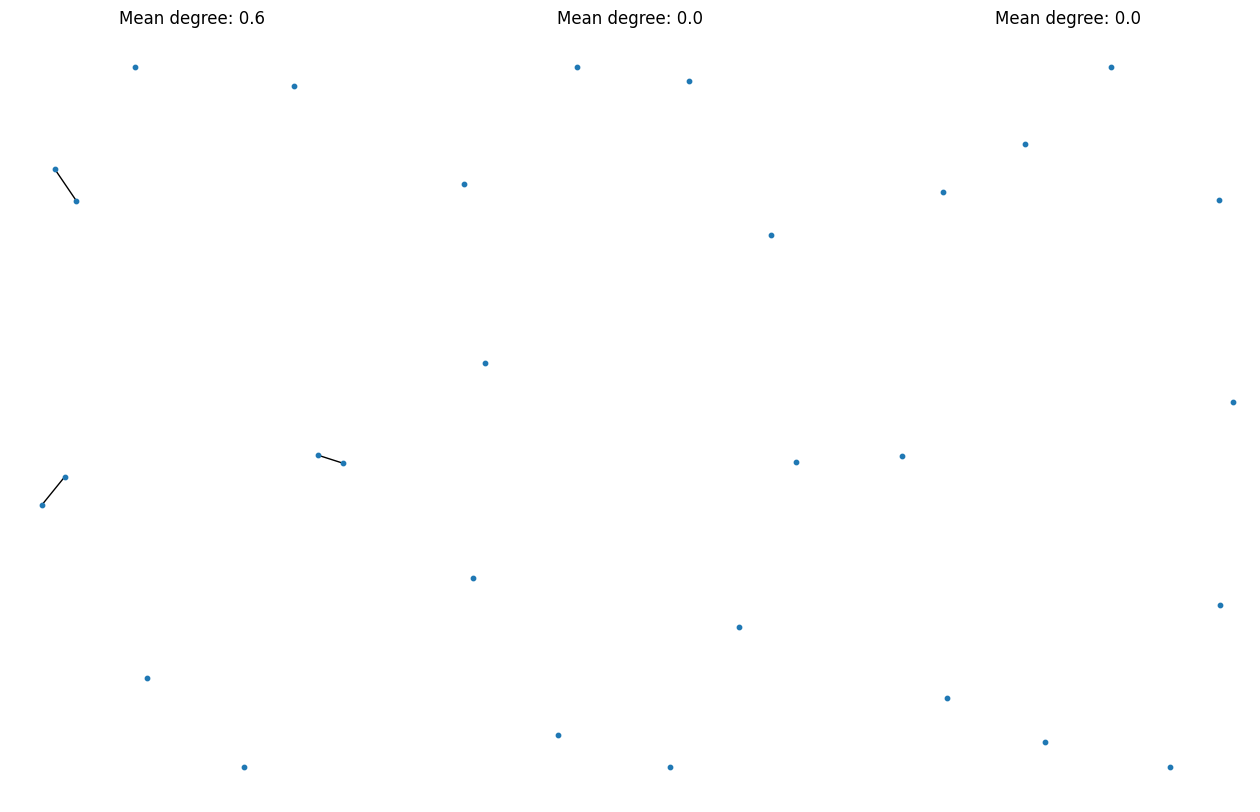

In [14]:
# Plot random subgraph (random nodes) not the first then as above
plt.figure(figsize=(16, 10))

# Iterate over the first 9 subplots
for i in range(3):
    # Take 10 randoms nodes
    sampled_nodes = list(graph.nodes())
    np.random.shuffle(sampled_nodes)
    sampled_nodes = sampled_nodes[:10]

    
    # Create a subgraph with the sampled nodes
    sampled_graph = graph.subgraph(sampled_nodes)

    degree = dict(sampled_graph.degree())
    mean_degree = np.mean(list(degree.values()))
    print(f"Mean degree for the first {len(sampled_nodes)} nodes: {mean_degree}")
    
    # Draw the subgraph and print the mean degree of the nodes present in this sampled graph
    #Put title for each subplot
    plt.subplot(1, 3, i + 1)
    plt.title(f"Mean degree: {mean_degree}")
    nx.draw(sampled_graph, with_labels=False, node_size=10)

In [15]:
# Calculate the mean degree of the nodes in the graph
degree = dict(graph.degree())
mean_degree = np.mean(list(degree.values()))
print(f"Mean degree: {mean_degree}")


Mean degree: 3476.2954958329433


In [16]:
# Take the last element of ratings['book_id'].value_counts()
ratings['book_id'].value_counts().index[-1]

7803

In [17]:
# The user (34590) with less ratings
ratings.query('user_id == 34590')

,user_id,book_id,rating
3456860,34590,2033,4
3456861,34590,2292,4
3474484,34590,6198,3
3474485,34590,127,4
3476800,34590,6625,5
3476812,34590,6723,5
3476814,34590,8855,4
3476819,34590,4171,4
3507023,34590,8634,4
3536987,34590,619,5


In [18]:
# degree of nodes 28672 (most rating's user_id)
print("Degree for the most rating's user_id: " ,degree[28672])

# Check the node degree of node 34590 (less rating's user_id)
print("Degree for the less rating's user_id: " ,degree[34590])


Degree for the most rating's user_id:  2088
Degree for the less rating's user_id:  102


In [19]:
degree = dict(graph.degree())

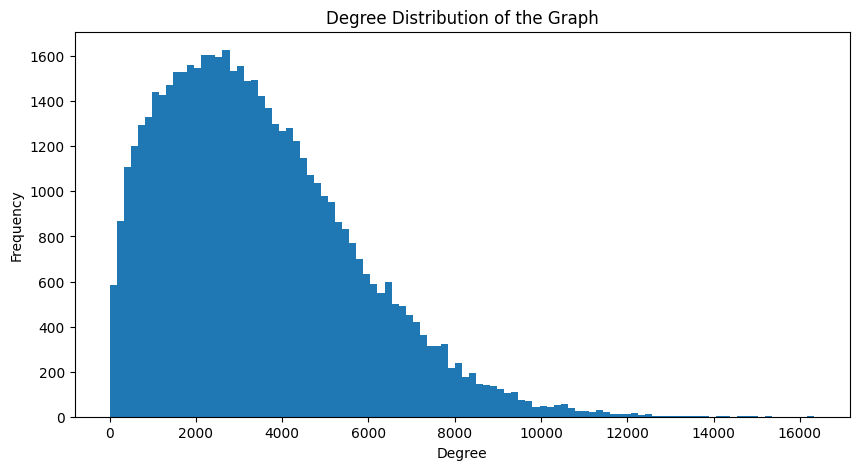

In [20]:
# Plot the degree distribution of the graph (in continous form)
plt.figure(figsize=(10, 5))
plt.hist(degree.values(), bins=100)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Graph')
plt.show()

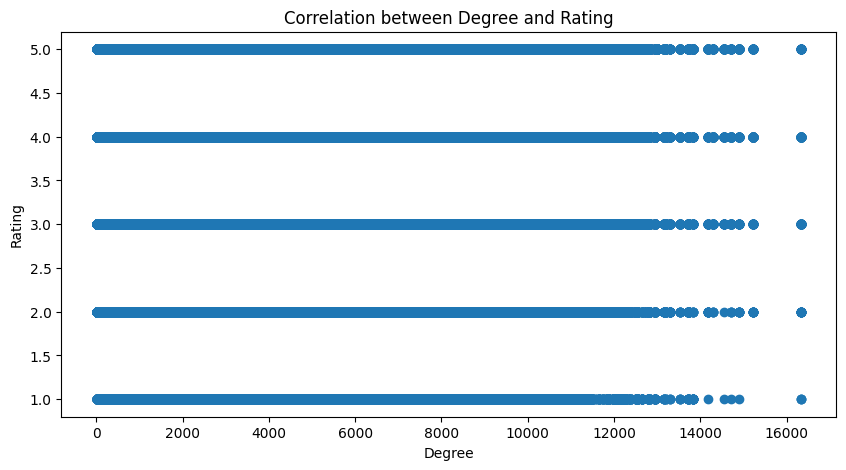

In [21]:
## Is the degree really representative of properties of the nodes in the graph? (Correlation between degree and ratings)
# Create a DataFrame with the degree of each node
degree_df = pd.DataFrame(list(degree.items()), columns=['node', 'degree'])

# Merge the degree DataFrame with the 'ratings' DataFrame
ratings_with_degree = ratings.merge(degree_df, left_on='user_id', right_on='node')

# Calculate the correlation between the degree of the nodes and the ratings
ratings_with_degree[['rating', 'degree']].corr()

# Plot results of the correlation
plt.figure(figsize=(10, 5))
plt.scatter(ratings_with_degree['degree'], ratings_with_degree['rating'])
plt.xlabel('Degree')
plt.ylabel('Rating')
plt.title('Correlation between Degree and Rating')
plt.show()

In [22]:
ratings_with_degree[['rating', 'degree']].corr()


,rating,degree
rating,1.000000,-0.025671
degree,-0.025671,1.000000


- Correlation Coefficient between rating and degree : No linear relation btw both
- Negative = slight tendency for the rating to decrease when degree increase (more professional)

In [23]:
import networkx as nx
import random

#Take only the first 1000 edges
edges = list(graph.edges())[:1000]


# Shuffle the edges
random.shuffle(edges)

# Split into train and test sets
train_size = int(len(edges) * 0.7)  # 70% of the data
G_train_edges = edges[:train_size]
G_test_edges = edges[train_size:]

# Create train and test graphs
G_train = graph.edge_subgraph(G_train_edges)
G_test = graph.edge_subgraph(G_test_edges)

## Book to Book graph 

In [24]:
# Create a Book to Book Graph (means if two books have been rated by the same user, we add an edge between them)
# So the edges is the user who rated the two books
# Create an empty graph
G_books = nx.Graph()

# Iterate over the 'ratings' DataFrame and add edges between books that have been rated by the same user
for user_id, user_ratings in tqdm(ratings.groupby('user_id')):
    # Get all pairs of books that have been rated by the same user
    book_pairs = combinations(user_ratings['book_id'], 2)
    
    # Add edges between all pairs of books
    for book_pair in book_pairs:
        G_books.add_edge(*book_pair, user_id=user_id)

# Print the number of nodes and edges in the graph
print(len(G_books.nodes()))
print(len(G_books.edges()))


100%|██████████| 53424/53424 [22:23<00:00, 39.76it/s]   


10000
27227005


In [25]:
# Create a graph kernel
gk = GraphKernel(kernel=[{"name": "shortest_path", "with_labels": False}])

## Prediction "To Read"

In [26]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [27]:
tr.shape

(912705, 2)

In [32]:
book_ids = tr['book_id'].nunique()
book_ids

9986

In [34]:
# Check how many times each book has been added to 'to read'
tr['book_id'].value_counts()

book_id
47      2772
143     1967
113     1840
13      1812
11      1767
        ... 
6297       1
7951       1
4434       1
9124       1
8946       1
Name: count, Length: 9986, dtype: int64

In [35]:
# Check how many times each book has been added to 'to read'
tr['book_id'].value_counts()

# Create a dictionary where the keys are user_ids and the values are sets of book_ids
user_books = defaultdict(set)

# Populate the dictionary
for _, row in tqdm(tr.iterrows(), total=tr.shape[0]):
    user_books[row['user_id']].add(row['book_id'])

# Create an empty graph
G_user_books = nx.Graph()

# Iterate over each user
for user_id, books in tqdm(user_books.items(), total=len(user_books)):
    # Generate all pairs of books for this user
    book_pairs = combinations(books, 2)
    
    # Add edges between all pairs of books
    for book_pair in book_pairs:
        G_user_books.add_edge(*book_pair, user_id=user_id)

# Print the number of nodes and edges in the graph
print(len(G_user_books.nodes()))
print(len(G_user_books.edges()))


  0%|          | 0/912705 [00:00<?, ?it/s]

100%|██████████| 48871/48871 [00:27<00:00, 1755.44it/s]


9986
6236948


In [ ]:
# Create a Book to Book Graph (means if two books have been rated by the same user, we add an edge between them)
# So the edges is the user who rated the two books
# Create an empty graph
G_books = nx.Graph()

# Iterate over the 'ratings' DataFrame and add edges between books that have been rated by the same user
for user_id, user_ratings in tqdm(tr.groupby('user_id')):
    # Get all pairs of books that have been rated by the same user
    book_pairs = combinations(user_ratings['book_id'], 2)
    
    # Add edges between all pairs of books
    for book_pair in book_pairs:
        G_books.add_edge(*book_pair, user_id=user_id)

# Print the number of nodes and edges in the graph
print(len(G_books.nodes()))
print(len(G_books.edges()))
